DESIGN OPTIMISATION HOMEWORK3

NAME: YONESHWAR BABU
ASU ID:12204554365

PROBLEM 1

![](DOq1.png)

In [88]:
import numpy as np
import math as m
import torch as t
from torch.autograd import Variable
import matplotlib.pyplot as plt
A= Variable(t.tensor([1.0, 1.0]), requires_grad=True) 
T = 20
x1 = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
print('x1=',x1)
x2=1-x1 #x1+x2=1 given
print('x2=',x2)
a = 0.001 # assigning the step size
a_water=np.array([8.07131,1730.63,233.426])
a_14dioxane=np.array([7.43155,1554.679,240.337])
p=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])
def p_sat(a,T): #defining a function to find psat for water and 1,4 diaxone
    return 10**(a[0]-((a[1])/(T+a[2]))) #
p_water=((p_sat(a_water,T)))
print("p water=", p_water)
p_14dioxane=((p_sat(a_14dioxane,T)))
print("p 14dioxane=",p_14dioxane)
for i in range(500):
    for i in range(0,10):
        T1 = (x1[i]*p_water*t.exp(A[0]*((A[1]*x2[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))
        T2 = (x2[i]*p_14dioxane*t.exp(A[1]*((A[0]*x1[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))
        loss = (((T1)+(T2))-p[i])**2
        loss.backward()
    A.grad.numpy()
    with t.no_grad():
        A -=a* A.grad
        A.grad.zero_()
soln=A.data.numpy()
print('The value of A12 is',soln[0],'& the value of A21 is',soln[1])
print('The final loss value =',loss.data.numpy())




x1= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x2= [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
p water= 17.47325208459706
p 14dioxane= 28.824099527405245
The value of A12 is 1.9584196 & the value of A21 is 1.6891851
The final loss value = 0.0008996979


No handles with labels found to put in legend.


[array(28.82409953)]
Optimised P value                 = 28.1
Mathematical model P value        = 28.824099527405245
[array(28.82409953), array(34.64431989)]
Optimised P value                 = 34.4
Mathematical model P value        = 34.64431988732041
[array(28.82409953), array(34.64431989), array(36.45297126)]
Optimised P value                 = 36.7
Mathematical model P value        = 36.45297125714593
[array(28.82409953), array(34.64431989), array(36.45297126), array(36.86731711)]
Optimised P value                 = 36.9
Mathematical model P value        = 36.867317108431905
[array(28.82409953), array(34.64431989), array(36.45297126), array(36.86731711), array(36.87400875)]
Optimised P value                 = 36.8
Mathematical model P value        = 36.87400875317847
[array(28.82409953), array(34.64431989), array(36.45297126), array(36.86731711), array(36.87400875), array(36.7498367)]
Optimised P value                 = 36.7
Mathematical model P value        = 36.74983669539946
[ar

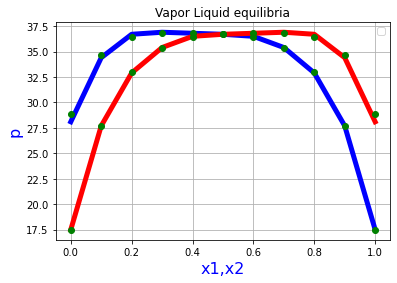

In [86]:
compareP_str=[]

for i in range(0,11):
    
    M1 =(x1[i]*m.exp(A[0]*((A[1]*x2[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))*p_water
    
    M2 =(x2[i]*m.exp(A[1]*((A[0]*x1[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))*p_14dioxane
    
    compareP=np.asarray(M1+M2)
    
    compareP_str.append(compareP)
    
    print(compareP_str)
      
    print("calculated P value   =",p[i])
    
    print("Model P value        =",compareP)
        
    
plt.plot(x1,p,'b', linewidth='5')
plt.grid()
plt.plot(x2,p,c= 'r', linewidth='5')
plt.xlabel('x1,x2',c='b',fontsize='16')
plt.ylabel('p',c='b',fontsize='16')
plt.legend()
plt.title('Vapor Liquid equilibria' )
plt.plot(x1,compareP_str,'go')
plt.plot(x2,compareP_str,'go')
plt.show()




![](DOq2.png)


In [64]:
from bayes_opt import BayesianOptimization
from matplotlib import pyplot as plt
from

def function(x, y):
    return ((4-(2.1*x**2)+((x**4)/3))*x**2+(x*y)+(-4+(4*y**2)*y**2))
    pbounds = {'x': (-3, 3), 'y': (-2, 2)}

optimizer = BayesianOptimization(f=function,pbounds=pbounds,random_state=1)

optimizer.maximize(init_points=2,n_iter=30)
print(optimizer.max)


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  1.158    | -0.4979   |  0.8813   |
|  2        | -108.6    | -2.999    | -0.7907   |
|  3        |  2.089    | -0.617    |  0.728    |
|  4        |  1.56     |  1.29     | -0.7013   |
|  5        | -132.6    |  3.0      |  1.55     |
|  6        | -59.82    |  0.1164   | -2.0      |
|  7        | -114.6    |  2.785    | -2.0      |
|  8        |  3.484    |  0.3693   |  0.02452  |
|  9        | -60.39    | -2.052    |  2.0      |
|  10       | -62.18    |  0.5601   |  2.0      |
|  11       |  1.378    |  1.347    |  0.2073   |
|  12       |  1.908    | -0.6572   | -0.5506   |
|  13       | -65.2     | -1.534    | -2.0      |
|  14       |  2.716    |  0.344    | -0.7222   |
|  15       |  2.063    |  0.9651   | -0.2657   |
|  16       | -0.6004   |  2.087    | -0.2576   |
|  17       |  3.633    | -0.3098   | -0.007782 |
|  18       |  1.729    | -1.313    |  0.06966  |
